<a href="https://colab.research.google.com/github/tshanedc/bikesharing_finalproject/blob/main/weekly__member_rides_pmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Dependencies
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from fbprophet import Prophet
import warnings;
warnings.simplefilter('ignore') 
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
data = '/content/drive/MyDrive/Colab Notebooks/member_rides.csv'
#df_train= pd.read_csv(data)
#file_path = Path('./Resources/Data/member_rides.csv')
member_rides_df = pd.read_csv(data)
member_rides_df.head(10)

,ds,y
0,2010-09-20 11:27:04,1
1,2010-09-20 11:41:22,1
2,2010-09-20 12:05:37,1
3,2010-09-20 12:06:05,1
4,2010-09-20 12:10:43,1
5,2010-09-20 12:14:27,1
6,2010-09-20 12:15:26,1
7,2010-09-20 12:16:36,1
8,2010-09-20 12:18:38,1
9,2010-09-20 12:19:46,1


In [ ]:
member_rides_df.dtypes

ds    object
y      int64
dtype: object

In [ ]:
member_rides_df['y'].value_counts()

1    22126756
0     6269130
Name: y, dtype: int64

In [ ]:
# Remove 'Casual-0' from 'y' column
member_rides_df = member_rides_df[member_rides_df.y != 0]

In [ ]:
member_rides_df['y'].value_counts()

1    22126756
Name: y, dtype: int64

In [ ]:
# Convert 'ds' object to datetime data type
member_rides_df['ds'] = pd.to_datetime(member_rides_df['ds'])

In [ ]:
member_rides_df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [ ]:
member_rides_df.head()

,ds,y
0,2010-09-20 11:27:04,1
1,2010-09-20 11:41:22,1
2,2010-09-20 12:05:37,1
3,2010-09-20 12:06:05,1
4,2010-09-20 12:10:43,1


In [ ]:
# Limit dates to 2010-2019
member_pre2020 = member_rides_df[member_rides_df['ds'] <= '2019-12-31']
member_pre2020.head(5) 

,ds,y
0,2010-09-20 11:27:04,1
1,2010-09-20 11:41:22,1
2,2010-09-20 12:05:37,1
3,2010-09-20 12:06:05,1
4,2010-09-20 12:10:43,1


In [ ]:
member_pre2020.shape 

(20686830, 2)

In [ ]:
# Create Weekly bins
memberxweek_df = member_pre2020.resample('w', on='ds').sum()
memberxweek_df.head(5)

,y
ds,
2010-09-26,1687
2010-10-03,2156
2010-10-10,3793
2010-10-17,5243
2010-10-24,6895


In [ ]:
memberxweek_df.shape 

(485, 1)

In [ ]:
# Create new column from 'index'
memberxweek_df.reset_index(inplace=True)
memberxweek_df = memberxweek_df.rename(columns = {'ds':'ds'})
memberxweek_df.head(8)

,ds,y
0,2010-09-26,1687
1,2010-10-03,2156
2,2010-10-10,3793
3,2010-10-17,5243
4,2010-10-24,6895
5,2010-10-31,7922
6,2010-11-07,8084
7,2010-11-14,10766


In [ ]:
memberxweek_df.shape

(485, 2)

In [ ]:
memberxweek_df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

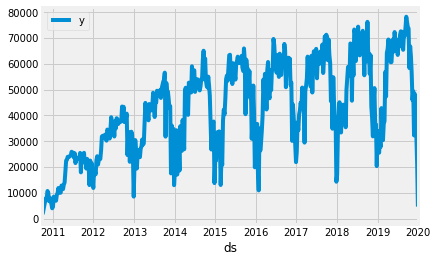

In [ ]:
memberxweek_df.plot(x='ds', y='y')

In [ ]:
# Create a train dataframe
train = memberxweek_df[memberxweek_df['ds'] <= '2017-12-31']
train.head(5)

,ds,y
0,2010-09-26,1687
1,2010-10-03,2156
2,2010-10-10,3793
3,2010-10-17,5243
4,2010-10-24,6895


In [ ]:
train.shape

(380, 2)

In [ ]:
# Create a test dataframe
test = memberxweek_df[memberxweek_df['ds'] >= '2017-12-31']

In [ ]:
test.shape

(106, 2)

In [ ]:
print(f"Number of weeks in train data: {len(train)}")
print(f"Number of weeks in test data: {len(test)}")

Number of weeks in train data: 380
Number of weeks in test data: 106


In [ ]:
# Instantiate and fit the Prophet model 
m = Prophet(interval_width=0.95, weekly_seasonality=True, changepoint_range=0.9) 
model = m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
weekly_member_future_data = model.make_future_dataframe(periods=106, freq='w')
weekly_member_future_data.tail()

,ds
481,2019-12-15
482,2019-12-22
483,2019-12-29
484,2020-01-05
485,2020-01-12


In [ ]:
# Make Predictions
weekly_member_forecast_data = model.predict(weekly_member_future_data)

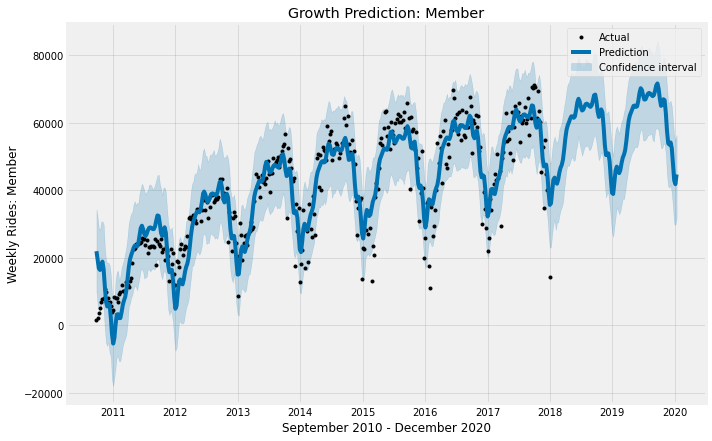

In [ ]:
# Plot Prediction
weekly_member_predict_fig = m.plot(weekly_member_forecast_data)
plt.title('Growth Prediction: Member')
plt.ylabel('Weekly Rides: Member')
plt.xlabel('September 2010 - December 2020')
plt.legend(['Actual', 'Prediction', 'Confidence interval'])
plt.show()

In [ ]:
weekly_member_forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
481,2019-12-15,52464.743852,40673.292778,65042.111325
482,2019-12-22,47707.707081,35759.015017,61107.285094
483,2019-12-29,42968.384011,29661.039446,55698.327146
484,2020-01-05,41837.130407,29244.633160,54197.640926
485,2020-01-12,44720.878173,32529.766632,56578.367388


In [ ]:
weekly_member_forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-26,4227.386244,10117.648035,34690.394029,4227.386244,4227.386244,17764.391398,17764.391398,17764.391398,7640.363878,7640.363878,7640.363878,10124.027520,10124.027520,10124.027520,0.0,0.0,0.0,21991.777642
1,2010-10-03,4421.666742,6905.593115,31487.763223,4421.666742,4421.666742,15031.618238,15031.618238,15031.618238,7640.363878,7640.363878,7640.363878,7391.254360,7391.254360,7391.254360,0.0,0.0,0.0,19453.284980
2,2010-10-10,4615.947239,4190.442331,28259.210100,4615.947239,4615.947239,12263.277346,12263.277346,12263.277346,7640.363878,7640.363878,7640.363878,4622.913468,4622.913468,4622.913468,0.0,0.0,0.0,16879.224585
3,2010-10-17,4810.227737,4350.994803,29799.647462,4810.227737,4810.227737,11611.204773,11611.204773,11611.204773,7640.363878,7640.363878,7640.363878,3970.840895,3970.840895,3970.840895,0.0,0.0,0.0,16421.432510
4,2010-10-24,5004.508234,6553.774763,30320.702841,5004.508234,5004.508234,12981.070421,12981.070421,12981.070421,7640.363878,7640.363878,7640.363878,5340.706543,5340.706543,5340.706543,0.0,0.0,0.0,17985.578655


In [ ]:
# Plot agains true data   --- https://medium.com/swlh/time-series-analysis-predictive-modeling-using-supervised-machine-learning-39d886675fbd
#lower_bound = (forecast_data.yhat_lower.iloc[train:])
#upper_bound = (forecast_data.yhat_upper.iloc[train:])

#plt.plot(forecast_data['yhat'], label-'Forecast', c='r')
#plt.plot(lower_bound, label='Confidence Interval', linestyle='--', c='b', alpha=0.3,)
#plt.plot(upper_bound, linestyle='--', c='b', alpha=0.3)
#plt.plot(prophet['y'], c='g', label='True Data')
#plt.legend()
#plt.title('Prophet Model Forecast vs Actual Data')

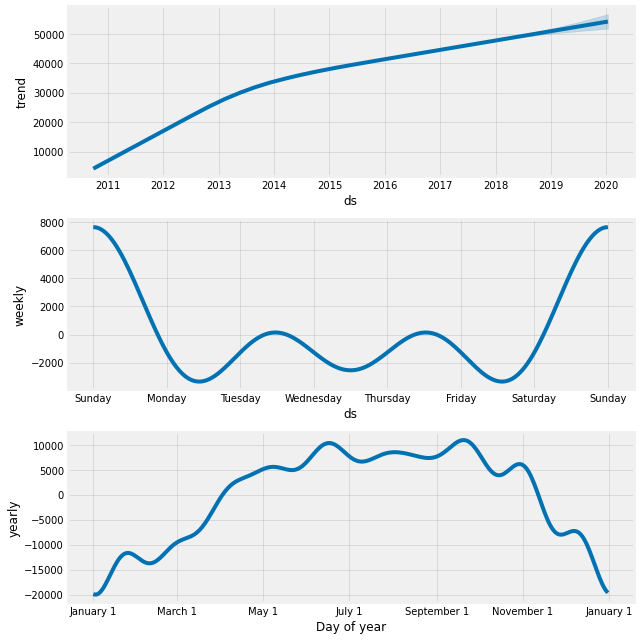

In [ ]:
# Decompose outputs
weekly_member_fig = model.plot_components(weekly_member_forecast_data)

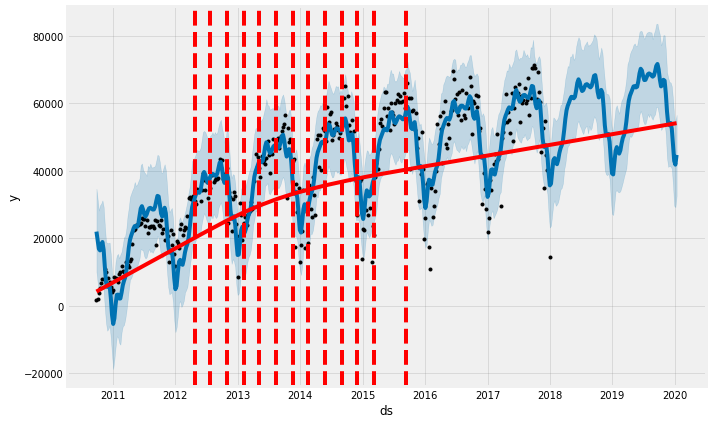

In [ ]:
# Plot changepoints
from fbprophet.plot import add_changepoints_to_plot
weekly_member_cp_fig = m.plot(weekly_member_forecast_data)
a = add_changepoints_to_plot(weekly_member_cp_fig.gca(), m, weekly_member_forecast_data)

In [ ]:
deltas = m.params['delta'].mean(0)
deltas

array([-4.76957393e-09,  3.14562893e-09, -1.40191822e-09,  6.20943097e-09,
       -1.07230720e-05, -2.21328230e-02, -1.13758870e-02, -7.29293893e-02,
       -1.18807570e-01, -9.20353160e-02, -1.00739818e-01, -1.02792985e-01,
       -4.04824477e-02, -5.01883456e-02, -3.54411669e-02, -2.16395647e-02,
       -2.72441464e-02, -1.08777545e-03, -1.29055679e-02, -2.26953612e-08,
       -2.04125111e-08, -6.71421066e-08,  1.61362111e-09,  2.83919209e-09,
       -3.26180023e-09])

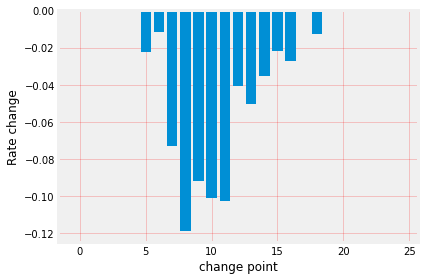

In [ ]:
# Plot changepoint changes
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('change point')
fig.tight_layout()

In [ ]:
# Cross Validation
from fbprophet.diagnostics import cross_validation
weekly_member_cv_results = cross_validation(model=m, initial='366', horizon='180 days', parallel='processes')
weekly_member_cv_results.head()

INFO:fbprophet:Making 28 forecasts with cutoffs between 2010-11-08 00:00:00 and 2017-07-04 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9dd6efd7d0>
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-11-14,11923.256344,11915.019483,11930.866278,10766,2010-11-08
1,2010-11-21,26049.481038,26027.920978,26072.481777,10042,2010-11-08
2,2010-11-28,49434.308759,49396.676085,49475.854211,6825,2010-11-08
3,2010-12-05,69304.719655,69246.406433,69366.582301,8137,2010-11-08
4,2010-12-12,71572.291422,71494.704699,71656.936662,6959,2010-11-08


In [ ]:
# Performance Metrics
from fbprophet.diagnostics import performance_metrics
weekly_member_pm = performance_metrics(weekly_member_cv_results)
weekly_member_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,18 days,6.848813e+07,8275.755581,6081.391963,0.247824,0.100842,0.750000
1,19 days,6.604637e+07,8126.891763,5965.641008,0.238773,0.100842,0.777778
2,20 days,1.041367e+08,10204.738113,6802.541615,0.359348,0.101411,0.763889
3,21 days,1.721491e+08,13120.558390,7628.351014,0.449766,0.100842,0.750000
4,22 days,3.287074e+08,18130.289636,9153.023943,0.513663,0.105561,0.722222
...,...,...,...,...,...,...,...
158,176 days,7.970497e+08,28232.069521,14021.903787,0.600581,0.120761,0.625000
159,177 days,9.035780e+08,30059.573512,15364.760636,0.655854,0.143878,0.597222
160,178 days,8.913263e+08,29855.088979,14960.058259,0.624241,0.135112,0.611111
161,179 days,7.491674e+08,27370.922729,13414.080761,0.550492,0.120761,0.638889
